### Reading model data: the *ReadGridded* class

This notebook introduces the [ReadGridded](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.io.readgridded.ReadGridded) class of pyaerocom, a flexible interface for importing model results from a single model, based on variable name (e.g. *od550aer*, *od550bc*), start / stop time stamps and temporal resolution (e.g. *hourly, 3hourly, daily, monthly*). 

The class is part of the [readgridded](http://aerocom.met.no/pyaerocom/api.html#module-pyaerocom.io.readgridded) module of pyaerocom, as well as the class [ReadGriddedMulti](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.io.readgridded.ReadGriddedMulti).

In the following cells, we create an instance of the the `ReadGridded` class and use this object to find and import data files containing the aerosol optical depth at 550 nm (*od550aer*) from the ECMWF CAMS reanalysis model (*ECMWF_CAMS_REAN*) for the years 2003-2007 in daily resolution. The files will be temporally merged and put into an instance of the `GriddedData` class. 

We start with creating a reading object, that will take care of finding the model directory for us (based on the model ID) and all valid NetCDF files on initialisation. Use the `print` commant to preview the string representation of `ReadGridded` object, which provides useful information about what is in there.

In [1]:
import pyaerocom as pya
pya.change_verbosity('critical')
read = pya.io.ReadGridded(name="ECMWF_CAMS_REAN",
                          start="1-1-2003",
                          stop="31-12-2007")
print(read)

2018-09-28 18:27:34,357:WARNING:
basemap extension library is not installed (or cannot be imported. Some features will not be available


OBS directory path /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0.SDA.AP/renamed does not exist


OBS directory path /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.AP/renamed does not exist


OBS directory path /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSun2.0.SDA.AP/renamed does not exist


OBS directory path /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/AeronetSunV3Lev2.0.AP/renamed does not exist


2018-09-28 18:27:35,233:WARNING:
geopy library is not available. Aeolus data read not enabled



Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available variables: ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 9999]
Available time resolutions ['daily', 'monthly']


The output contains information about all variables that were found and all corresponding years. These information is extracted from the filenames, which have to follow the AEROCOM file naming conventions.

**Please note** that at this point, no data is actually imported but only the paths are set that contain data for this model. In order to read one variable, call the ``read_var`` function with a valid variable name. You can check available variables using the ``vars`` attribute (or by printing the string representation, as shown in the cell above).

In [2]:
print("Detected variables for model %s:\n %s" %(read.name, read.vars))

Detected variables for model ECMWF_CAMS_REAN:
 ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']


In [3]:
data = read.read_var(var_name="od550aer", ts_type="daily")
data

pyaerocom.GriddedData
Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 1826; latitude: 161; longitude: 320)>

The returned data object is of type [GriddedData](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.griddeddata.GriddedData) class, which will be introduced in more detail later. This data object is returned by the ``read_var`` method and can also be accessed from the instance of the reading class using:

In [4]:
d = read.data["od550aer"]
d is data #?

True

We may also import other variables using either the above used method ``read_var`` or the more general ``read`` method which can read single or multiple variables on the run.

In [5]:
read.read(['od550bc', 'od550dust', 'od550oa', 'od550so4'])

(pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 1826; latitude: 161; longitude: 320)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 1826; latitude: 161; longitude: 320)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 1826; latitude: 161; longitude: 320)>,
 pyaerocom.GriddedData
 Grid data: <iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 1826; latitude: 161; longitude: 320)>)

Now let's double check if all variables have been imported.

In [6]:
print(read)


Pyaerocom ReadGridded
---------------------
Model ID: ECMWF_CAMS_REAN
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_CAMS_REAN/renamed
Available variables: ['ang4487aer', 'od440aer', 'od550aer', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'od865aer']
Available years: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 9999]
Available time resolutions ['daily', 'monthly']

Loaded GriddedData objects:

Pyaerocom GriddedData
---------------------
Variable: od550aer
Temporal resolution: daily
Start / Stop: 2003-01-01T00:00:00.000000 - 2007-12-31T00:00:00.000000

Pyaerocom GriddedData
---------------------
Variable: od550bc
Temporal resolution: daily
Start / Stop: 2003-01-01T00:00:00.000000 - 2007-12-31T00:00:00.000000

Pyaerocom GriddedData
---------------------
Variable: od550dust
Temporal resolution: daily
Start / Stop: 2003-01-01T00:00:00.000000 - 2007-12-31T00:00:00.000000

Pyaerocom GriddedData
--------

In the following we continue with the ``od550aer`` data object that was loaded first and that was assigned the name ``data`` above. 

In [7]:
print("\nThe data object is of type %s and contains %d time stamps" %(type(data), data.shape[0]))


The data object is of type <class 'pyaerocom.griddeddata.GriddedData'> and contains 1826 time stamps


The returned [GriddedData](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.griddeddata.GriddedData) object contains 1826 time stamps. Given that the defined period of 5 years includes one leap year, we should expect that we imported data for each day of the five years?

In [8]:
print(1826 == 5*365+1)

True


#### Remark on time definition

If you run this notebook with ``verbose=True`` in the reading object, you will receive the output

``Error message: AttributeError('Cube does not contain time dimension',) 
Invalid time axis in file ECMWF_CAMS_REAN.daily.od550aer.2007.nc. Attempting to correct.``

several times when reading the data. This warning indicates, that the corresponding data in the netCDF files has some issue with the time dimension. Here, the time variable is not properly defined in the NetCDF file. Pyaerocom can correct for this on data import by 

1. First checking if the time dimension in the NetCDF file is correct according to CF convention ([see here for details on the implementation](http://aerocom.met.no/pyaerocom/api.html#pyaerocom.io.helpers.check_time_coord) and if a problem is detected, then ...
2. the time axis is redefined based on the year and time resolution (*ts_type*) that is encrypted in the filename. The latter requires that the file follows one of the [pyaerocom file conventions](http://aerocom.met.no/pyaerocom/config_files.html#file-conventions).


#### A very brief introduction into the GriddedData class

Now as a final step, we briefly introduce some of the features of the `GriddedData` class by computing and plotting a time series of the global weighted average aerosol optical density as well as the same time series at the coordinates in the city of Leipzig, Germany.

/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/analysis/cartography.py:377: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")


Interpolating data of shape (1826, 161, 320). This may take a while.


Successfully interpolated cube


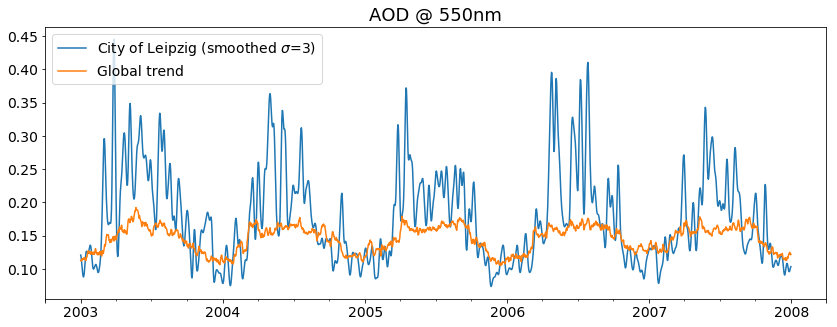

In [9]:
from pandas import Series
from scipy.ndimage import gaussian_filter1d
#compute global mean (area weighted)
glob_mean = data.area_weighted_mean()

#extract AODs at the position of Leipzig
lon_leipzig = 12.44
lat_leipzig = 51.35

data_leipzig = data.interpolate([("latitude", lat_leipzig), 
                                 ("longitude", lon_leipzig)])

# create pandas Series for global average
s_glob = Series(glob_mean, index=data.time_stamps())

# create pandas Series for leipzig average (and smooth in time)
GAUSS_SIGMA = 3
s_leipzig = Series(gaussian_filter1d(data_leipzig.grid.data, GAUSS_SIGMA), 
                   data_leipzig.time_stamps())

ax = s_leipzig.plot(label=r"City of Leipzig (smoothed $\sigma$=%d)" %GAUSS_SIGMA, figsize=(14,5))
s_glob.plot(label="Global trend", ax=ax)
ax.legend()
tit = ax.set_title("AOD @ 550nm")

In the following section, the `ReadGriddedMulti` class is introduced, which is largely based on the `ReadGridded` class and allows for importing data from multiple models.